# Sınıflandırma Problemleri

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

## Lojistik Regresyon

### Model

In [3]:
diabetes=pd.read_csv("diabetes.csv")
df=diabetes.copy()
df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Outcome burada bağımlı değişkendir
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

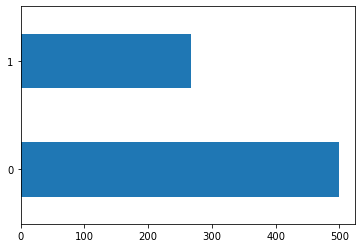

In [9]:
df["Outcome"].value_counts().plot.barh()

In [11]:
# şimdi betimsel istatistiklere bakıyoruz
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [13]:
y=df["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [18]:
X=df.drop(["Outcome"],axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [22]:
# şimdi stats model aracılığıyla kullanıyoruz
# statsmodel

In [19]:
loj=sm.Logit(y,X)
loj

In [20]:
loj_model=loj.fit()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


In [21]:
loj_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Sat, 29 Oct 2022   Pseudo R-squ.:                 0.05922
Time:                        12:03:09   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
loj=LogisticRegression(solver="liblinear")
loj_model=loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [26]:
# sabit değerini alıyoruz 
loj_model.intercept_ 

array([-5.85986161])

In [27]:
#bütün değişkenlerin katsayıları
loj_model.coef_

array([[ 1.16912604e-01,  2.83133925e-02, -1.69330599e-02,
         7.86949021e-04, -6.33349234e-04,  5.94785140e-02,
         6.60167821e-01,  7.17936702e-03]])

In [28]:
# şimdi hızlandırılmış bir şekilde ilerliyeceğiz

### Tahmin & Model Tuning

In [29]:
# burada aslında model doğrulama işlemi yapacağız

In [30]:
y_pred=loj_model.predict(X)

In [31]:
# karmaşıklık matrisi için bu fonsiyonu kullanıyoruz
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]])

In [32]:
accuracy_score(y,y_pred)

0.7747395833333334

In [33]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [39]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [40]:
# şimdi ise olasılık değerlerini hesaplıyoruz
loj_model.predict_proba(X)[0:10]

array([[0.35166451, 0.64833549],
       [0.91641945, 0.08358055],
       [0.2257798 , 0.7742202 ],
       [0.92054046, 0.07945954],
       [0.17167558, 0.82832442],
       [0.79790744, 0.20209256],
       [0.87907136, 0.12092864],
       [0.27656592, 0.72343408],
       [0.31934154, 0.68065846],
       [0.92202008, 0.07797992]])

In [41]:
y[0:10]
# gerçek değerler

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [77]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [78]:
y_pred =[1 if i > 0.5 else 0 for i in y_probs]

In [79]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [80]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]])

In [83]:
accuracy_score(y,y_pred)
#doğruluk skorumuz başarımızın kısası

0.7747395833333334

In [82]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [84]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.64833549, 0.08358055, 0.7742202 , 0.07945954, 0.82832442])

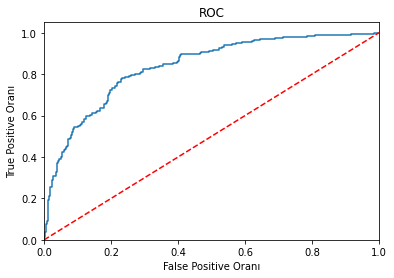

In [85]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [87]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [88]:
accuracy_score(y_test,loj_model.predict(X_test))

0.7532467532467533

In [89]:
cross_val_score(loj_model,X_test,y_test,cv=10)

array([0.79166667, 0.82608696, 0.73913043, 0.82608696, 0.73913043,
       0.91304348, 0.7826087 , 0.65217391, 0.65217391, 0.7826087 ])

In [90]:
cross_val_score(loj_model,X_test,y_test,cv=10).mean()

0.7704710144927536

## Gaussian Naive Bayes

### Model & Tahmin

In [92]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [93]:
from sklearn.naive_bayes import GaussianNB

In [94]:
nb=GaussianNB()
nb_model=nb.fit(X_train,y_train)
nb_model

GaussianNB()

In [96]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [97]:
# şimdi ise olasılık değerlerine erişiyoruz
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [98]:
y_pred=nb_model.predict(X_test)

In [99]:
accuracy_score(y_test,y_pred)

0.7445887445887446

In [100]:
cross_val_score(nb_model,X_test,y_test,cv=10).mean()

0.775

## K en yakın komşu algoritması(KNN)

### Model & Tahmin

In [102]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [103]:
knn=KNeighborsClassifier()

In [104]:
knn_model=knn.fit(X_train,y_train)
knn_model

KNeighborsClassifier()

In [105]:
y_pred=knn_model.predict(X_test)

In [106]:
accuracy_score(y_test,y_pred)

0.6883116883116883

In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



### Model Tuning

In [109]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [110]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [111]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.748637316561845
En iyi parametreler: {'n_neighbors': 11}


In [113]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)

In [114]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

In [115]:
y_pred = knn_tuned.predict(X_test)

In [116]:
accuracy_score(y_test, y_pred)

0.7316017316017316

## SVC
### Model & Tahmin

In [118]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [119]:
svc_model=SVC(kernel="linear").fit(X_train,y_train)

In [120]:
svc_model

SVC(kernel='linear')

In [121]:
y_pred=svc_model.predict(X_test)

In [122]:
accuracy_score(y_test,y_pred)

0.7445887445887446

### Model Tuning

In [123]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [124]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 1}


In [125]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)

In [126]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

In [127]:
# aşağıda doğrusal olmayan svc yi yapacağız

## RBF SVC
### Model&Tuning

In [128]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [129]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [130]:
svc_model

SVC()

In [131]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

In [133]:
# birçok bilgiyi öğrenmek için
dir(svc_model)

['C',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_proba',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dense_predict_proba',
 '_dual_coef_',
 '_estimator_type',
 '_gamma',
 '_get_coef',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_intercept_',
 '_more_tags',
 '_n_support',
 '_pairwise',
 '_probA',
 '_probB',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sparse',
 '_sparse_decision_function',
 '_sparse_fit',
 '_sparse_kernels',
 '_sparse_predict',
 '_sparse_pr

### Model Tuning

In [134]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [135]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [136]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 10, 'gamma': 0.0001}


In [137]:
svc_tuned = SVC(C = 10, gamma = 0.0001).fit(X_train, y_train)

In [138]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END ..............................C=0.0001, gamma=0.001; total time=   0.0s
[CV] END ..............................C=0.0001, gamma=0.001; total time=   0.0s
[CV] END ................................C=0.0001, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.0001, gamma=1; total time=   0.0s
[CV] END ..................................C=0.0001, gamma=5; total time=   0.0s
[CV] END .................................C=0.0001, gamma=10; total time=   0.0s
[CV] END .................................C=0.0001, gamma=10; total time=   0.0s
[CV] END .................................C=0.0001, gamma=50; total time=   0.0s
[CV] END .................................C=0.0001, gamma=50; total time=   0.0s
[CV] END .................................C=0.001, gamma=0.1; total time=   0.0s
[CV] END .................................C=0.001, gamma=0.1; total time=   0.0s
[CV] END ...................

## Yapay Sinir Ağları
### Model&Tahmin

In [139]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [140]:
from sklearn.preprocessing import StandardScaler  

In [141]:
scaler = StandardScaler()

In [142]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [143]:
from sklearn.neural_network import MLPClassifier

In [144]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [147]:
mlpc.coefs_
#kat sayılara erişmeyi sağlar

[array([[-0.20259855,  0.19214437, -0.15133602, -0.18441559,  0.18375607,
         -0.35327522, -0.14433192,  0.0136865 , -0.38262288,  0.13241377,
         -0.17614305, -0.31468161, -0.13461321, -0.12482315,  0.2213967 ,
          0.08687923,  0.25645018, -0.19821703,  0.01211599,  0.27861829,
          0.22441476,  0.13298862, -0.29757894,  0.06500492,  0.08296675,
          0.06022971, -0.14499843,  0.26039518, -0.29630812, -0.15994406,
         -0.09666997, -0.02368758,  0.27689462,  0.13650522, -0.13009918,
         -0.18753953,  0.2016834 , -0.27141009, -0.27343693,  0.29550913,
         -0.11593075, -0.17778371, -0.37791878,  0.11971505, -0.03834949,
         -0.04850566,  0.1128013 , -0.22342505,  0.02503652, -0.45665108,
         -0.09956568, -0.13326393,  0.2165958 , -0.06097362,  0.15816014,
          0.11052044, -0.03096495, -0.11418726, -0.0691479 ,  0.16115105,
         -0.31765923, -0.36757867,  0.09921119, -0.16240462, -0.26860388,
         -0.17347804,  0.06220635, -0.

In [148]:
#model nesnesinden erişilebilecek ifadelere bakıyoruz
dir(mlpc)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_backprop',
 '_check_feature_names',
 '_check_n_features',
 '_check_solver',
 '_compute_loss_grad',
 '_estimator_type',
 '_fit',
 '_fit_lbfgs',
 '_fit_stochastic',
 '_forward_pass',
 '_forward_pass_fast',
 '_get_param_names',
 '_get_tags',
 '_init_coef',
 '_initialize',
 '_label_binarizer',
 '_loss_grad_lbfgs',
 '_more_tags',
 '_no_improvement_count',
 '_optimizer',
 '_random_state',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_unpack',
 '_update_no_improvement_count',
 '_validate_data',
 '_validate_hyperparameters',
 '_validate_inpu

In [149]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)
# scaled ifadesi düzeltilmiş test setini gösterir

0.7272727272727273

### Model Tuning

In [150]:
mlpc

MLPClassifier()

In [151]:
?mlpc

Type:        MLPClassifier
String form: MLPClassifier()
File:        ~/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'adam'}, default='

In [152]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

In [153]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


/Users/mehmetakifkiraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mehmetakifkiraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/mehmetakifkiraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWa

GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [154]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'solver': 'sgd'}


In [155]:
mlpc_tuned = MLPClassifier(activation = "logistic", 
                           alpha = 0.1, 
                           hidden_layer_sizes = (100, 100, 100),
                          solver = "adam")

In [156]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', alpha=0.1,
              hidden_layer_sizes=(100, 100, 100))

In [157]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7316017316017316

[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=a

## CART
### Model&Tahmin

In [183]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [184]:
from sklearn.tree import DecisionTreeClassifier

In [185]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [186]:
cart_model

DecisionTreeClassifier()

In [187]:
!pip install skompiler

In [188]:
from skompiler import skompile

In [189]:
print(skompile(cart.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((0 if x[5] <= 32.59999942779541 else 1) if x[5] <= 
    37.39999961853027 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (
    0 if x[6] <= 0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else
    0) if x[0] <= 4.5 else 1 if x[2] <= 67.0 else 0) if x[5] <= 
    49.10000038146973 else 1) if x[1] <= 127.5 else 1 if x[2] <= 56.0 else 
    (0 if x[7] <= 27.5 else 1 if x[5] <= 28.149999618530273 else 0) if x[5] <=
    30.300000190734863 else 1 if x[5] <= 32.000000953674316 else ((0 if x[5
    ] <= 33.75 else 1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else
    0) if x[2] <= 85.0 else 1) if x[7] <= 28.5 else (1 if x[7] <= 29.5 else
    (0 if x[1] <= 133.0 else (1 if x[0] <= 5.0 else 0) if x[2] <= 73.0 else
    0) if x[2] <= 94.0 else 1 if x[0] <= 9.0 else 0) if x[5] <= 
    26.949999809265137 els

In [180]:
x=[8]
# burası girilen değer sayısını ifade ediyor geçirilen hamilelik sayısı

In [181]:
(((0 if x[0] <= 0.5 else 0 if x[0] <= 1.5 else 0) if x[0] <= 2.5 else (0 if
    x[0] <= 3.5 else 0) if x[0] <= 4.5 else 0 if x[0] <= 5.5 else 0) if x[0
    ] <= 6.5 else (((1 if x[0] <= 7.5 else 1) if x[0] <= 8.5 else 1) if x[0
    ] <= 9.5 else (0 if x[0] <= 10.5 else 0) if x[0] <= 11.5 else 0 if x[0] <=
    12.5 else 0) if x[0] <= 13.5 else 1)

1

In [190]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6883116883116883

### Model Tuning

In [191]:
cart_model

DecisionTreeClassifier()

In [192]:
?cart_model

Type:        DecisionTreeClassifier
String form: DecisionTreeClassifier()
File:        ~/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2
    The minimum number of samples required to split an internal node:

    - If int

In [193]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [194]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [195]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 5, 'min_samples_split': 19}


In [198]:
#final

In [199]:
cart = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 19)
cart_tuned = cart.fit(X_train, y_train)

In [200]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

## Random Forests

In [201]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [202]:
from sklearn.ensemble import RandomForestClassifier

In [203]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [204]:
rf_model

RandomForestClassifier()

In [205]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

### Model Tuning 

In [206]:
rf_model

RandomForestClassifier()

In [207]:
?rf_model

Type:        RandomForestClassifier
String form: RandomForestClassifier()
Length:      100
File:        ~/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" f